In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Verify Kaggle Input Directory
This step checks whether the dataset is properly attached.


In [9]:
import os
os.listdir("/kaggle/input")


['credit-dataset']

## Load Credit Dataset from Kaggle
The dataset is accessed from Kaggle's input directory.


In [10]:
import os

os.listdir("/kaggle/input/credit-dataset")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


['credit_risk_dataset.csv']

## Load Credit Risk Dataset


In [11]:
import pandas as pd

df = pd.read_csv("/kaggle/input/credit-dataset/credit_risk_dataset.csv")
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
df.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [13]:
# Drop non-numeric or ID columns if present
df = df.drop(columns=["person_id"], errors="ignore")

# Target variable
y = df["loan_status"]

# Feature variables
X = df.drop("loan_status", axis=1)


## Encoding Categorical Features


In [15]:
# One-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)


## Train-Test Split


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Logistic Regression Model


In [20]:
X.isna().sum().sort_values(ascending=False).head(10)


loan_int_rate          3116
person_emp_length       895
person_age                0
loan_intent_MEDICAL       0
loan_grade_G              0
loan_grade_F              0
loan_grade_E              0
loan_grade_D              0
loan_grade_C              0
loan_grade_B              0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy="mean")

X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_imputed, columns=X.columns)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Logistic Regression Model Training


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
## Model Evaluation


In [25]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7983734847322388

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5072
           1       0.71      0.15      0.25      1445

    accuracy                           0.80      6517
   macro avg       0.76      0.57      0.57      6517
weighted avg       0.78      0.80      0.74      6517

ROC-AUC Score: 0.7523391876698722


## Feature Scaling
Standardization is applied to improve Logistic Regression performance.


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)


## Confusion Matrix


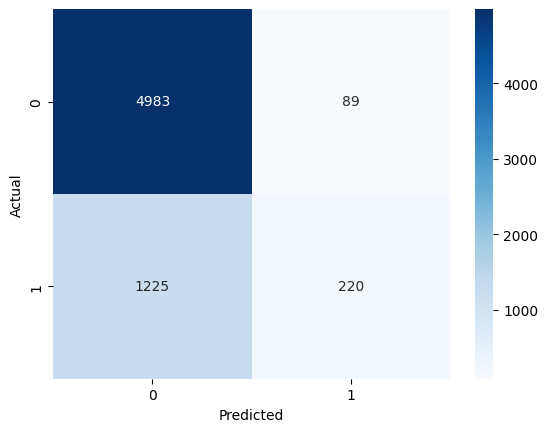

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, rf_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, rf_prob)
    ]
})

results


NameError: name 'rf_pred' is not defined

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [31]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))


Random Forest Accuracy: 0.9297222648457879
Random Forest ROC-AUC: 0.9335607391964024


In [32]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, rf_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, rf_prob)
    ]
})

results


,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.798373,0.752339
1,Random Forest,0.929722,0.933561


## Multiple Test Predictions
This section tests the model on multiple unseen customer samples
to validate real-world usability.


In [33]:
# Select multiple random test samples
test_samples = X_test.sample(5, random_state=42)

predictions = model.predict(test_samples)
probabilities = model.predict_proba(test_samples)[:, 1]

results = test_samples.copy()
results["Actual"] = y_test.loc[test_samples.index].values
results["Predicted"] = predictions
results["Approval_Probability"] = probabilities

results


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,Actual,Predicted,Approval_Probability
26024,31.0,70550.0,9.0,18000.0,19.740000,0.22,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0.279014
6126,24.0,20000.0,8.0,6000.0,7.140000,0.30,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.457162
20835,29.0,42000.0,0.0,5000.0,14.960000,0.12,9.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.234086
12036,22.0,72644.0,3.0,5900.0,7.490000,0.08,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.087189
29681,45.0,35000.0,6.0,4800.0,11.011695,0.14,12.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.285142


In [34]:
for i, idx in enumerate(test_samples.index):
    print(f"Sample {i+1}:")
    print("Actual Status :", y_test.loc[idx])
    print("Predicted     :", predictions[i])
    print("Probability   :", round(probabilities[i], 2))
    print("-" * 30)


Sample 1:
Actual Status : 1
Predicted     : 0
Probability   : 0.28
------------------------------
Sample 2:
Actual Status : 0
Predicted     : 0
Probability   : 0.46
------------------------------
Sample 3:
Actual Status : 1
Predicted     : 0
Probability   : 0.23
------------------------------
Sample 4:
Actual Status : 1
Predicted     : 0
Probability   : 0.09
------------------------------
Sample 5:
Actual Status : 0
Predicted     : 0
Probability   : 0.29
------------------------------
